# Linear Regression

In [30]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_blobs, load_breast_cancer
from sklearn.metrics import euclidean_distances
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.utils import Bunch

Dataset

Text(0, 0.5, 'Target')

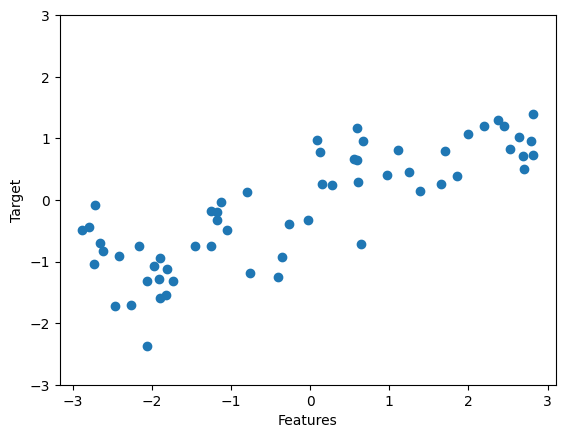

In [4]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_wave(60)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Features')
plt.ylabel('Target')

In [54]:
def plot_linear_regression_wave():
    X, y = make_wave(n_samples=60)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    line = np.linspace(-3, 3, 100).reshape(-1, 1)

    lr = LinearRegression().fit(X_train, y_train)

    print("w[0]: %f  b: %f" % (lr.coef_[0], lr.intercept_))
    print(f'Slope/Weights:     {lr.coef_}')
    print(f'Offset/Intercept:  {lr.intercept_}')
    print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
    print("Test set score:     {:.2f}".format(lr.score(X_test, y_test)))
    
    cm2 = ListedColormap(['#0000aa', '#ff2020'])

    plt.figure(figsize=(8, 8))
    plt.plot(line, lr.predict(line))
    plt.plot(X, y, 'o', c=cm2(0))
    ax = plt.gca()

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    ax.set_ylim(-3, 3)
    ax.legend(["model", "training data"], loc="best")
    ax.grid(True)
    ax.set_aspect('equal')

w[0]: 0.393906  b: -0.031804
Slope/Weights:     [0.39390555]
Offset/Intercept:  -0.031804343026759746
Training set score: 0.67
Test set score:     0.66


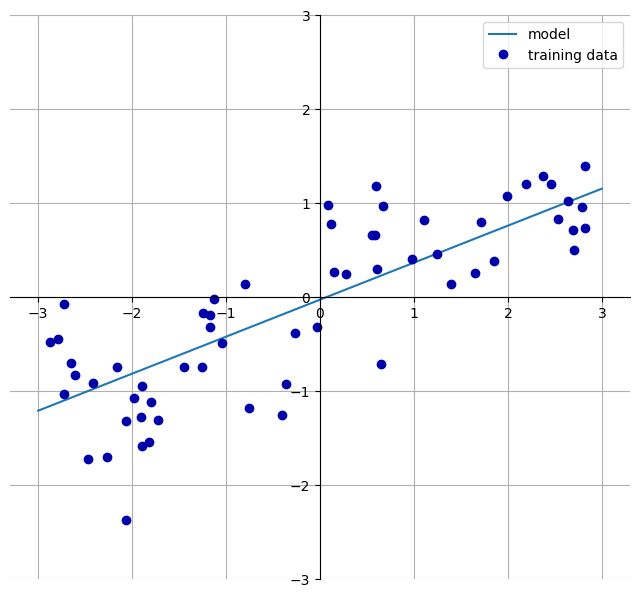

In [55]:
plot_linear_regression_wave()

## Comparando Linear Regression Models

In [6]:
def load_boston():
    try:
        from sklearn.datasets import load_boston
        return load_boston()
    except ImportError:
        pass
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return Bunch(data=data, target=target)


def load_extended_boston():
    boston = load_boston()
    X = boston.data

    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dylan.velo\AppData\Local\Temp\ipykernel_31960\1283952922.py:8: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [15]:
X, y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### Ridge (Regularización L2)

Ridge regression, o regresión de cresta, es una técnica de regularización que se utiliza para mejorar el rendimiento de un modelo de regresión lineal al penalizar los coeficientes de las variables. Esta penalización se logra añadiendo un término de penalización a la función de pérdida que es proporcional a la suma de los cuadrados de los coeficientes. Este enfoque ayuda a prevenir el sobreajuste al reducir la magnitud de los coeficientes y, por lo tanto, simplificar el modelo. Ridge regression es especialmente útil cuando se tienen muchas características correlacionadas o cuando el número de características es grande en comparación con el número de muestras.

- **Mayor *alpha***: Aumenta la penalización sobre la magnitud de los coeficientes. Esto hace que los coeficientes se acerquen más a cero, reduciendo su impacto en la predicción y ayudando a evitar el sobreajuste.

- **Menor *alpha***: Reduce la penalización, permitiendo que los coeficientes sean más grandes y se ajusten más a los datos de entrenamiento. Esto puede aumentar el riesgo de sobreajuste si los coeficientes son demasiado grandes.

In [12]:
ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


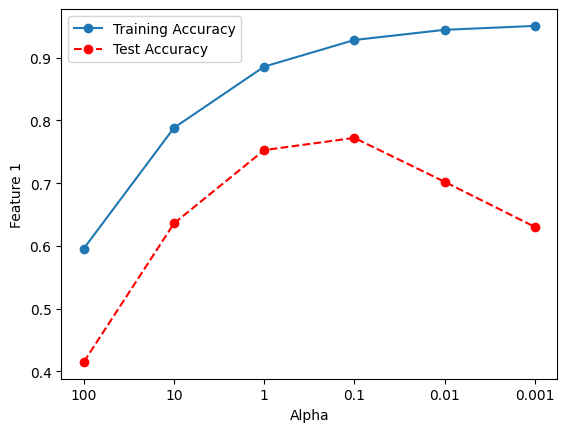

In [17]:
training_accuracy = []
test_accuracy = []
alpha = [100,10,1,0.1,0.01,0.001]

for a in alpha:
    model = Ridge(alpha=a).fit(X_train, y_train)
    model.fit(X_train, y_train)

    training_accuracy.append(model.score(X_train,y_train)) 
    test_accuracy.append(model.score(X_test,y_test))
    
alpha_labels = [str(a) for a in alpha]
plt.plot(alpha_labels, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(alpha_labels, test_accuracy, label='Test Accuracy', linestyle='--', marker='o', color='red')
plt.ylabel('Feature 1')
plt.xlabel('Alpha')
plt.legend()

El Eje Y: Indica la magnitud del coeficiente de cada característica en el modelo. Para los modelos de Ridge con diferentes valores de alpha, la magnitud de los coeficientes puede variar. Un valor de alpha mayor en Ridge tiende a reducir la magnitud de los coeficientes debido a la regularización más fuerte.

Eje X: Representa los índices de los coeficientes. Los índices corresponden a las diferentes características del modelo.

**Comparación entre Modelos:**

- Ridge con alpha mayor: La regularización más fuerte tiende a reducir la magnitud de los coeficientes, haciéndolos más pequeños y más cerca de cero. Esto es visible en el gráfico cuando comparas alpha=10 con alpha=0.1.

- Regresión Lineal: El modelo sin regularización (LinearRegression) tiende a tener coeficientes con mayor magnitud y posiblemente más variabilidad en comparación con Ridge.

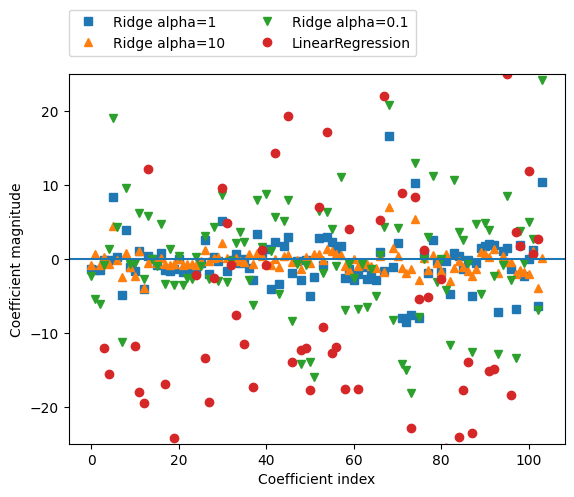

In [35]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

En conjuntos de datos pequeños: Ridge tiende a tener un test score mejor debido a la regularización que previene el sobreajuste. Linear Regression puede tener un test score inferior debido al sobreajuste.

En conjuntos de datos grandes: Ambos modelos mejoran, pero la diferencia entre Ridge y Linear Regression se reduce. Linear Regression puede incluso superar a Ridge en términos de test score cuando hay suficiente información para ajustar el modelo sin penalización.

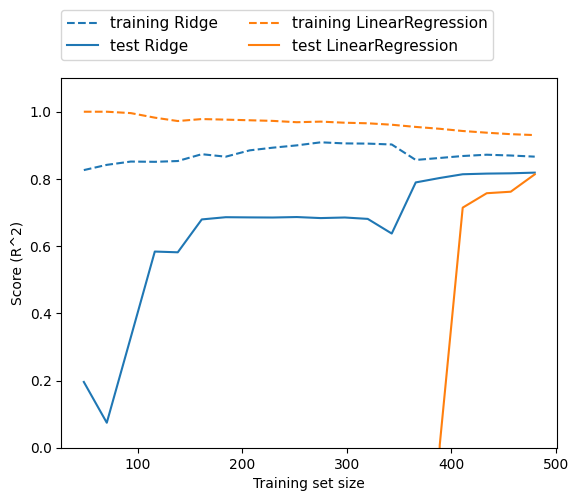

In [29]:
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)


X, y = load_extended_boston()

plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

### Lasso (Regularización L1)

Lasso regression, o regresión Lasso (Least Absolute Shrinkage and Selection Operator), es una técnica de regularización utilizada en la regresión lineal que penaliza la magnitud de los coeficientes mediante la suma de sus valores absolutos. A diferencia de Ridge regression, que usa la suma de los cuadrados de los coeficientes, Lasso agrega un término de penalización proporcional a la suma de los valores absolutos de los coeficientes en la función de pérdida. Esto no solo ayuda a prevenir el sobreajuste, sino que también tiene el efecto adicional de realizar selección de características, ya que puede reducir algunos coeficientes exactamente a cero, eliminando efectivamente esas características del modelo.

- **Mayor *alpha:*** Incrementa la penalización sobre la magnitud de los coeficientes, lo que tiende a reducir algunos coeficientes a cero. Esto lleva a modelos más simples con menos características, mejorando la interpretabilidad y ayudando a evitar el sobreajuste, especialmente en conjuntos de datos con muchas características.

- **Menor *alpha:*** Disminuye la penalización, permitiendo que más coeficientes tengan valores significativos. Esto puede llevar a modelos más complejos que se ajustan más a los datos de entrenamiento, pero también aumenta el riesgo de sobreajuste si muchos coeficientes tienen valores grandes. Mientras mas chico alpha, mas features utilizados.

En resumen, Lasso regression es útil no solo para prevenir el sobreajuste mediante la regularización, sino también para la selección automática de características, simplificando el modelo al reducir algunos coeficientes a cero.

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [32]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [33]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


- Lasso con valores altos de alpha (por ejemplo, alpha=1) tiende a llevar muchos coeficientes exactamente a cero, resultando en un modelo más esparcido y simplificado. A medida que alpha disminuye, menos coeficientes son reducidos a cero, y los coeficientes se vuelven más grandes.

- Ridge con alpha=0.1 penaliza la magnitud de todos los coeficientes pero no los reduce a cero. Los coeficientes del modelo Ridge se mantienen más uniformemente distribuidos y menores en comparación con los coeficientes no regularizados, pero todos permanecen presentes en el modelo.

Esta gráfica ilustra cómo la regularización L1 (Lasso) y L2 (Ridge) afectan la magnitud de los coeficientes de los modelos con diferentes niveles de penalización.

Text(0, 0.5, 'Coefficient magnitude')

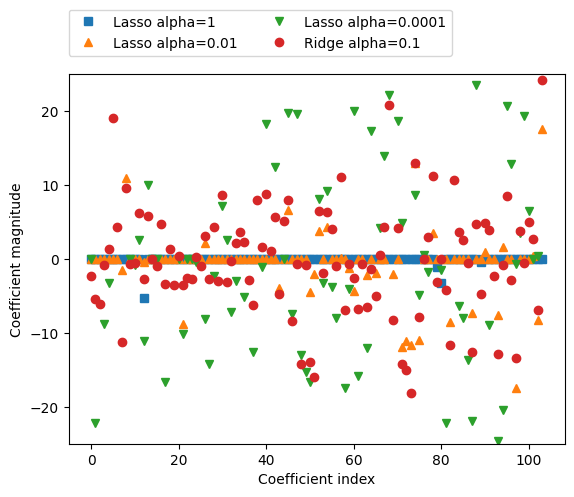

In [34]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")